In [8]:
import numpy as np
import pymc3 as pm
import matplotlib.pylab as plt
%matplotlib inline
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.4.1


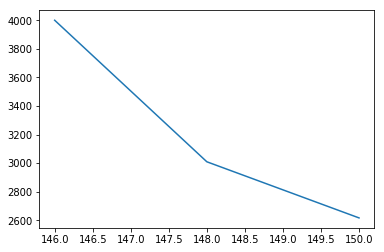

In [9]:
# only three data points!
E = np.array([146.0, 148.0, 150.0])
i_s = np.array([ 4000.,  3009.,  2616.])
dE = 3

plt.plot(E, i_s);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, r]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:03<00:00, 540.98draws/s]
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


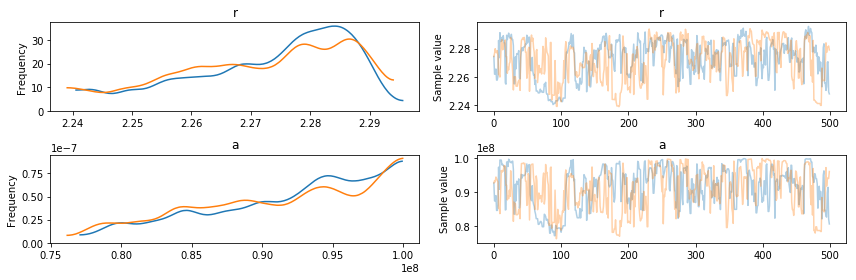

In [11]:
with pm.Model() as basic_model:

    r = pm.Uniform('r', lower=1, upper=4)
    a = pm.Uniform('a', lower=100000, upper=1e8)

    I_expect = a / (1 - r)  * ((E + dE / 2.0) ** (1 - r) - (E - dE / 2.0) ** (1 - r ))

    I_obs = pm.Poisson('I_obs', mu=I_expect, observed=i_s)

    # Calculate the trace
    trace = pm.sample()

pm.traceplot(trace);

In [12]:
with basic_model:
    map1 = pm.find_MAP()
map1

logp = -149.77, ||grad|| = 0.31696: 100%|██████████| 89/89 [00:00<00:00, 1622.18it/s]  


{'r_interval__': array(-0.28101051),
 'a_interval__': array(14.08696687),
 'r': array(2.29061816),
 'a': array(99999923.84942655)}